In [38]:
print("Hello world")

Hello world


In [39]:
import pandas as pd
from service_time_fake import *

In [40]:
service_time1 = service_time(2, 3, True, True, "0680", None, None)
service_time2 = service_time(20, 3, True, True, "0680", None, None)
service_time3 = service_time(40, 3, True, True, "0680", None, None)
service_time4 = service_time(10, 3, True, True, "0680", None, None)
service_time5 = service_time(15, 3, True, True, "0680", None, None)
service_time6 = service_time(90, 3, True, True, "0680", None, None)
service_time7 = service_time(500, 3, True, True, "0680", None, None)
service_time9 = service_time(50, 3, True, True, "0680", None, None)
service_time10 = service_time(43, 3, True, True, "0680", None, None)

In [41]:
service_time1.actual_st

7

In [42]:
df = [service_time1, service_time2, service_time3, service_time4, service_time5, service_time6, service_time7, service_time9, service_time10]

for x in range (1, 10000, 1):
    service_time_sample = service_time(None, None, None, None, None, None, None)
    df.append(service_time_sample)

df = pd.DataFrame(vars(f) for f in df)

df.tail()

,gross_weight,floor,can_use_trolley,has_elevator,postnr,predicted_st,actual_st
10003,66,2,True,False,0694,None,15.6
10004,21,2,True,True,0693,None,8.0
10005,54,10,False,False,0697,None,28.5
10006,42,6,True,False,0697,None,18.2
10007,20,0,False,True,0693,None,5.0


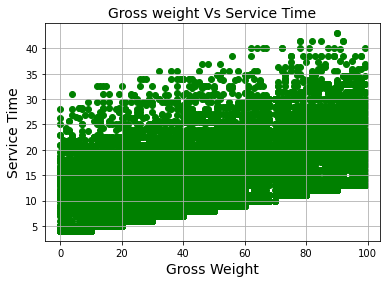

In [43]:
import matplotlib.pyplot as plt
df2 = df[df['gross_weight'] < 100]
plt.scatter(df2['gross_weight'], df2['actual_st'], color='green')
plt.title('Gross weight Vs Service Time', fontsize=14)
plt.xlabel('Gross Weight', fontsize=14)
plt.ylabel('Service Time', fontsize=14)
plt.grid(True)
plt.show()

In [44]:
from sklearn.model_selection import train_test_split 

X = df.drop(['predicted_st', 'actual_st'],axis=1) 
Y = df['actual_st']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=0)

In [45]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression().fit(X_train, Y_train)
reg_predict = reg_model.predict(X_test) #Predictions on Testing data
print(reg_predict)

[10.9047929  19.09970611 16.26257762 ...  1.90952925 20.63339857
 17.43031013]


In [46]:
X_test

,gross_weight,floor,can_use_trolley,has_elevator,postnr
9062,62,0,True,False,0697
836,68,8,True,True,0698
3726,3,6,False,False,0695
4499,79,4,True,False,0690
8679,49,2,False,False,0698
...,...,...,...,...,...
8484,100,8,True,False,0693
1578,85,3,False,False,0695
5886,4,1,True,True,0697
2892,38,5,False,False,0692


In [47]:
service_time_test1 = service_time(30, 3, True, True, "0690", 12, None)
service_time_test2 = service_time(30, 3, True, True, "0691", 12, None)

df_test = [service_time_test1, service_time_test2]
df_test = pd.DataFrame(vars(f) for f in df_test)
df_test = df_test.drop(['predicted_st', 'actual_st'],axis=1)
df_test

,gross_weight,floor,can_use_trolley,has_elevator,postnr
0,30,3,True,True,0690
1,30,3,True,True,0691


In [48]:
Test1 = reg_model.predict(df_test)
Test1

array([11.6050617 , 11.07590661])

In [49]:
df_test['predicted_st'] = Test1
df_test

,gross_weight,floor,can_use_trolley,has_elevator,postnr,predicted_st
0,30,3,True,True,0690,11.605062
1,30,3,True,True,0691,11.075907


In [50]:
reg_model.score(X_train, Y_train)

0.8410152257994479

In [51]:
reg_model.score(X_test, Y_test)

0.8475899475504438

In [52]:
df.sort_values(by=['gross_weight'])

,gross_weight,floor,can_use_trolley,has_elevator,postnr,predicted_st,actual_st
6175,0,9,False,True,0696,None,16.25
4891,0,1,False,True,0696,None,5.00
7184,0,6,False,False,0695,None,15.00
2467,0,9,True,True,0692,None,13.00
550,0,6,True,False,0696,None,13.00
...,...,...,...,...,...,...,...
7835,293,2,False,False,0692,None,52.50
8602,294,5,True,True,0697,None,38.00
8788,297,4,True,False,0694,None,48.10
4991,299,8,True,True,0695,None,41.00


### Creating a new dataframe with random values again, but for prediction

In [53]:
df_testing = [service_time1, service_time2, service_time3, service_time4, service_time5, service_time6, service_time7, service_time9, service_time10]

for x in range (1, 100, 1):
    service_time_sample = service_time(None, None, None, None, None, None, None)
    df_testing.append(service_time_sample)

df_testing = pd.DataFrame(vars(f) for f in df_testing)
df_testing_actual = df_testing['actual_st']
df_testing = df_testing.drop(['predicted_st', 'actual_st'],axis=1)
df_testing['predicted_st'] = reg_model.predict(df_testing)

df_testing


,gross_weight,floor,can_use_trolley,has_elevator,postnr,predicted_st
0,2,3,True,True,0680,13.525483
1,20,3,True,True,0680,15.692638
2,40,3,True,True,0680,18.100587
3,10,3,True,True,0680,14.488663
4,15,3,True,True,0680,15.090650
...,...,...,...,...,...,...
103,40,5,True,False,0697,15.408829
104,81,1,False,True,0691,17.174655
105,65,4,False,False,0690,23.511885
106,68,9,True,False,0694,26.089648


In [54]:
df_testing['actual'] = df_testing_actual
df_testing

,gross_weight,floor,can_use_trolley,has_elevator,postnr,predicted_st,actual
0,2,3,True,True,0680,13.525483,7.0
1,20,3,True,True,0680,15.692638,8.0
2,40,3,True,True,0680,18.100587,10.0
3,10,3,True,True,0680,14.488663,7.0
4,15,3,True,True,0680,15.090650,8.0
...,...,...,...,...,...,...,...
103,40,5,True,False,0697,15.408829,15.6
104,81,1,False,True,0691,17.174655,13.0
105,65,4,False,False,0690,23.511885,31.0
106,68,9,True,False,0694,26.089648,24.7


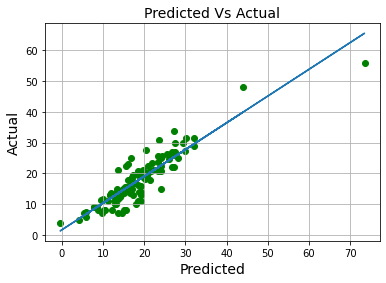

In [55]:
import numpy as np

plt.scatter(df_testing['predicted_st'], df_testing['actual'], color='green')

m, b = np.polyfit(df_testing['predicted_st'], df_testing['actual'], 1)
plt.plot(df_testing['predicted_st'], m*df_testing['predicted_st'] + b)

plt.title('Predicted Vs Actual', fontsize=14)
plt.xlabel('Predicted', fontsize=14)
plt.ylabel('Actual', fontsize=14)
plt.grid(True)
plt.show()